# Table of Contents
1 - [Problem Statement](#ps)  
2 - [Overview of Dataset](#dataset)     
3 - [Train and Test Split of Data](#split)  
4 - [Linerar Regression using sklearn](#lr)      
5 - [Linear Regression using Stocahastic Gradient Descent Manually(Without sklearn)](#sgd)     
6 - [Conclusion](#conclusion)

## [1] Problem Statement : <a name="ps"></a>

-  Performing Linear Regression on Boston Dataset using sklearn.
-  Appling Stochastic Gradient Descent manually(without sklearn) on Boston dataset to :  
&emsp; 1)Find the optimal weight vector(Slope)  
&emsp; 2)Find the optimal bias(intercept)  
&emsp; 3)Comparing the results obtained with sklearn regressor results.

## [2] Overview of Dataset : <a name="dataset"></a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print("Shape of boston data: ",boston.data.shape)
print(boston.feature_names)

Shape of boston data:  (506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [6]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
bos['PRICE'] = boston.target
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
X = bos.drop('PRICE',axis = 1)
Y = bos['PRICE']

## [3] Train and Test Split of Data : <a name="split"></a>

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## [4] Linerar Regression using sklearn : <a name="lr"></a>   

In [11]:
from sklearn.linear_model import LinearRegression
def linear_regression():
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    optimal_W = model.coef_ 
    optimal_b = model.intercept_
    error = Y_test - Y_pred
    
    MSE = (1/X_test.shape[0]) * np.sum(error**2)
    RMSE = np.sqrt(MSE)
    
    print("\n\033[1mOptimal W: \033[0m",optimal_W)
    print("\n\033[1mOptimal intercept(bias): \033[0m",np.round(optimal_b,3))
    print("\n\033[1mMSE: \033[0m",np.round(MSE,3))
    print("\n\033[1mRMSE: \033[0m",np.round(RMSE,3))
    
    return Y_pred,error
    
if __name__ == "__main__":   
    Y_pred_sklearn,error_sklearn = linear_regression()


Optimal W:  [-0.98213794  0.86729819  0.40781039  0.86221098 -1.90626375  2.80199743
 -0.35691613 -3.04777133  2.02981068 -1.36223075 -2.08528939  1.05413356
 -3.9329093 ]

Optimal intercept(bias):  22.971

MSE:  20.747

RMSE:  4.555


## [5] Linear Regression using Stocahastic Gradient Descent Manually(Without sklearn) : <a name="sgd"></a>

<b>Batch_size = 32</b>   
<b>Learning Rate = 0.01</b>  
<b>No of Iterations = 1000</b>

In [12]:
def batch_train(X, y, batchSize):
    for i in np.arange(0, X.shape[0], batchSize):
        yield (X[i:i + batchSize], y[i:i + batchSize])

In [15]:
def stochastic_grad_descent(x_train, y_train, n_iter = 1000, learning_rate=0.01):
    
    #Initial weight and bias
    b = 0
    W = np.random.normal(loc = 0, scale = 1, size=(x_train.shape[1],))

    y_train = np.asarray(y_train)
    n = x_train.shape[0]
    loss = []
    
    for i in range(n_iter):
        print("\n\033[1mEpoch {}---------------->\033[0m".format(i))
        
        count =0
        
        #Batch Training
        for (X_batch, y_batch) in batch_train(x_train, y_train, 32):
    
            yhat = X_batch.dot(W) + b
            error = y_batch-yhat
            sq_loss = (1/n) * np.sum(error ** 2)
            
            W_grad = -(2/n) * X_batch.T.dot(error)
            b_grad = -(2/n) * np.sum(error)
            
            #Update Rule
            W = W - (learning_rate * W_grad)
            b = b - (learning_rate * b_grad)
            count+= 1
        
            print("Batch: {}, Squared Loss: {}".format(count,sq_loss))
            
        loss.append(np.average(sq_loss))

    
    return W, b, loss

In [16]:
optimal_W,optimal_b, loss = stochastic_grad_descent(X_train, Y_train)


Epoch 0---------------->
Batch: 1, Squared Loss: 58.96991252145059
Batch: 2, Squared Loss: 78.87345393924836
Batch: 3, Squared Loss: 48.295800408194076
Batch: 4, Squared Loss: 47.244722384684934
Batch: 5, Squared Loss: 63.75590842396496
Batch: 6, Squared Loss: 64.30081405333395
Batch: 7, Squared Loss: 60.36503138558152
Batch: 8, Squared Loss: 58.948502783014476
Batch: 9, Squared Loss: 49.967586825778426
Batch: 10, Squared Loss: 54.58032247863731
Batch: 11, Squared Loss: 31.36427418821356

Epoch 1---------------->
Batch: 1, Squared Loss: 56.981086790723026
Batch: 2, Squared Loss: 75.40909853938282
Batch: 3, Squared Loss: 46.02267992841256
Batch: 4, Squared Loss: 45.00331388302631
Batch: 5, Squared Loss: 61.48640043055904
Batch: 6, Squared Loss: 61.049598333553675
Batch: 7, Squared Loss: 57.570818952034216
Batch: 8, Squared Loss: 56.27057212832287
Batch: 9, Squared Loss: 47.86791750969162
Batch: 10, Squared Loss: 52.05875975092563
Batch: 11, Squared Loss: 30.448375578017632

Epoch 2----

Batch: 1, Squared Loss: 6.841734676236473
Batch: 2, Squared Loss: 10.194628417586092
Batch: 3, Squared Loss: 3.154445517517732
Batch: 4, Squared Loss: 4.141208996481187
Batch: 5, Squared Loss: 9.725821547905078
Batch: 6, Squared Loss: 5.593015343342695
Batch: 7, Squared Loss: 5.23331159888241
Batch: 8, Squared Loss: 5.549203114614536
Batch: 9, Squared Loss: 4.242240943101568
Batch: 10, Squared Loss: 3.7214125040757717
Batch: 11, Squared Loss: 5.842536564685384

Epoch 67---------------->
Batch: 1, Squared Loss: 6.674386104378658
Batch: 2, Squared Loss: 9.99474932952409
Batch: 3, Squared Loss: 3.0634549043752903
Batch: 4, Squared Loss: 4.022031161249144
Batch: 5, Squared Loss: 9.534877782880779
Batch: 6, Squared Loss: 5.449449049509268
Batch: 7, Squared Loss: 5.085039295041334
Batch: 8, Squared Loss: 5.402796394815494
Batch: 9, Squared Loss: 4.1135506269677595
Batch: 10, Squared Loss: 3.594662207788334
Batch: 11, Squared Loss: 5.746436326434019

Epoch 68---------------->
Batch: 1, Square

Batch: 3, Squared Loss: 1.7206265032813108
Batch: 4, Squared Loss: 1.571187518755174
Batch: 5, Squared Loss: 5.171303613853748
Batch: 6, Squared Loss: 2.6103892771883546
Batch: 7, Squared Loss: 2.092308853709073
Batch: 8, Squared Loss: 2.3974600256608114
Batch: 9, Squared Loss: 1.5723565554920163
Batch: 10, Squared Loss: 1.2188903310847021
Batch: 11, Squared Loss: 3.5840110406510646

Epoch 113---------------->
Batch: 1, Squared Loss: 3.17200826692348
Batch: 2, Squared Loss: 5.564311202033117
Batch: 3, Squared Loss: 1.7194761886478143
Batch: 4, Squared Loss: 1.5516174703656593
Batch: 5, Squared Loss: 5.12818394077073
Batch: 6, Squared Loss: 2.5897037592562606
Batch: 7, Squared Loss: 2.06981797420948
Batch: 8, Squared Loss: 2.373593170703746
Batch: 9, Squared Loss: 1.5542502790881043
Batch: 10, Squared Loss: 1.2043166367363811
Batch: 11, Squared Loss: 3.563520765264249

Epoch 114---------------->
Batch: 1, Squared Loss: 3.1448896607373866
Batch: 2, Squared Loss: 5.524807331956117
Batch: 

Batch: 11, Squared Loss: 3.159443547585589

Epoch 145---------------->
Batch: 1, Squared Loss: 2.6566059855200987
Batch: 2, Squared Loss: 4.738491783957638
Batch: 3, Squared Loss: 1.8128710516084146
Batch: 4, Squared Loss: 1.1918962769649393
Batch: 5, Squared Loss: 4.230542231634812
Batch: 6, Squared Loss: 2.2353717200633607
Batch: 7, Squared Loss: 1.6854638425030533
Batch: 8, Squared Loss: 1.9395020268028809
Batch: 9, Squared Loss: 1.2540825562310578
Batch: 10, Squared Loss: 0.9967275845840152
Batch: 11, Squared Loss: 3.151568420894211

Epoch 146---------------->
Batch: 1, Squared Loss: 2.6483388642134043
Batch: 2, Squared Loss: 4.722831838609068
Batch: 3, Squared Loss: 1.8174170958732072
Batch: 4, Squared Loss: 1.18598453373457
Batch: 5, Squared Loss: 4.212935619472677
Batch: 6, Squared Loss: 2.2302908448579957
Batch: 7, Squared Loss: 1.6801347384402587
Batch: 8, Squared Loss: 1.9325522986502615
Batch: 9, Squared Loss: 1.2501090655043023
Batch: 10, Squared Loss: 0.9950459382691921
Ba

Batch: 10, Squared Loss: 1.0040872868540753
Batch: 11, Squared Loss: 2.9438414597385747

Epoch 192---------------->
Batch: 1, Squared Loss: 2.46524077733007
Batch: 2, Squared Loss: 4.293706864356881
Batch: 3, Squared Loss: 1.9932122971508288
Batch: 4, Squared Loss: 1.0434787892051869
Batch: 5, Squared Loss: 3.715820406668683
Batch: 6, Squared Loss: 2.1295709533413785
Batch: 7, Squared Loss: 1.5926471001094602
Batch: 8, Squared Loss: 1.7741259265833247
Batch: 9, Squared Loss: 1.183223147358327
Batch: 10, Squared Loss: 1.0050367608415047
Batch: 11, Squared Loss: 2.941396709798698

Epoch 193---------------->
Batch: 1, Squared Loss: 2.4636750880868177
Batch: 2, Squared Loss: 4.288351936002123
Batch: 3, Squared Loss: 1.9959099044119524
Batch: 4, Squared Loss: 1.0419466753729618
Batch: 5, Squared Loss: 3.7093650279887465
Batch: 6, Squared Loss: 2.128849533169463
Batch: 7, Squared Loss: 1.5925645146253933
Batch: 8, Squared Loss: 1.7726195094941206
Batch: 9, Squared Loss: 1.1829917115271473
Ba

Batch: 5, Squared Loss: 3.5022300436367555
Batch: 6, Squared Loss: 2.1120636638008414
Batch: 7, Squared Loss: 1.611285408106562
Batch: 8, Squared Loss: 1.7322544951944319
Batch: 9, Squared Loss: 1.1832208963396973
Batch: 10, Squared Loss: 1.0472126754777697
Batch: 11, Squared Loss: 2.8667919155967607

Epoch 240---------------->
Batch: 1, Squared Loss: 2.428155590119173
Batch: 2, Squared Loss: 4.119883459469793
Batch: 3, Squared Loss: 2.0751290083666842
Batch: 4, Squared Loss: 0.9955867120923637
Batch: 5, Squared Loss: 3.4990846587591697
Batch: 6, Squared Loss: 2.111869931005422
Batch: 7, Squared Loss: 1.6119334127417766
Batch: 8, Squared Loss: 1.7317547463298395
Batch: 9, Squared Loss: 1.1833110559957165
Batch: 10, Squared Loss: 1.0479638468667494
Batch: 11, Squared Loss: 2.865765506516789

Epoch 241---------------->
Batch: 1, Squared Loss: 2.4278733900371314
Batch: 2, Squared Loss: 4.117520786215599
Batch: 3, Squared Loss: 2.0760089490894984
Batch: 4, Squared Loss: 0.9949456915765716


Batch: 2, Squared Loss: 4.03535379063827
Batch: 3, Squared Loss: 2.095713693346544
Batch: 4, Squared Loss: 0.9724060087866816
Batch: 5, Squared Loss: 3.381614588725379
Batch: 6, Squared Loss: 2.104185731374968
Batch: 7, Squared Loss: 1.6453653398896115
Batch: 8, Squared Loss: 1.7153814693182055
Batch: 9, Squared Loss: 1.187195103666885
Batch: 10, Squared Loss: 1.0767333391767893
Batch: 11, Squared Loss: 2.8286334569480744

Epoch 290---------------->
Batch: 1, Squared Loss: 2.4226773307744405
Batch: 2, Squared Loss: 4.034126591105029
Batch: 3, Squared Loss: 2.0957880498414454
Batch: 4, Squared Loss: 0.9720665531509746
Batch: 5, Squared Loss: 3.379767601344173
Batch: 6, Squared Loss: 2.104045779506152
Batch: 7, Squared Loss: 1.646040525225365
Batch: 8, Squared Loss: 1.715162295159969
Batch: 9, Squared Loss: 1.1872567997875594
Batch: 10, Squared Loss: 1.0771812817106052
Batch: 11, Squared Loss: 2.8280631994935526

Epoch 291---------------->
Batch: 1, Squared Loss: 2.4226782618528486
Batch

Batch: 11, Squared Loss: 2.8091243037573985

Epoch 330---------------->
Batch: 1, Squared Loss: 2.424099624615506
Batch: 2, Squared Loss: 3.9950128885982763
Batch: 3, Squared Loss: 2.0929888773860967
Batch: 4, Squared Loss: 0.9613793174497325
Batch: 5, Squared Loss: 3.316895881755811
Batch: 6, Squared Loss: 2.0986735826968284
Batch: 7, Squared Loss: 1.6718125220776294
Batch: 8, Squared Loss: 1.7086254990125878
Batch: 9, Squared Loss: 1.1892927689525545
Batch: 10, Squared Loss: 1.0919548062953273
Batch: 11, Squared Loss: 2.80870650904574

Epoch 331---------------->
Batch: 1, Squared Loss: 2.4241602199428374
Batch: 2, Squared Loss: 3.994238120026097
Batch: 3, Squared Loss: 2.092816412152998
Batch: 4, Squared Loss: 0.9611734794620725
Batch: 5, Squared Loss: 3.3155495158307042
Batch: 6, Squared Loss: 2.0985448803481317
Batch: 7, Squared Loss: 1.6724222933877368
Batch: 8, Squared Loss: 1.7085081617890812
Batch: 9, Squared Loss: 1.1893359055693093
Batch: 10, Squared Loss: 1.092258948938579
B

Batch: 11, Squared Loss: 2.792594207377128

Epoch 375---------------->
Batch: 1, Squared Loss: 2.427343346262211
Batch: 2, Squared Loss: 3.9668128709358554
Batch: 3, Squared Loss: 2.0829975963690406
Batch: 4, Squared Loss: 0.9542836383551053
Batch: 5, Squared Loss: 3.2639107956173405
Batch: 6, Squared Loss: 2.0931992110425197
Batch: 7, Squared Loss: 1.6974901249260124
Batch: 8, Squared Loss: 1.7049288192228207
Batch: 9, Squared Loss: 1.1910811304002684
Batch: 10, Squared Loss: 1.1034722406279223
Batch: 11, Squared Loss: 2.7922711334577888

Epoch 376---------------->
Batch: 1, Squared Loss: 2.427422591057571
Batch: 2, Squared Loss: 3.966314278210996
Batch: 3, Squared Loss: 2.0827448601338605
Batch: 4, Squared Loss: 0.954168844743302
Batch: 5, Squared Loss: 3.2628828469498323
Batch: 6, Squared Loss: 2.0930854802786163
Batch: 7, Squared Loss: 1.6980203405679926
Batch: 8, Squared Loss: 1.7048778412380667
Batch: 9, Squared Loss: 1.1911189945902076
Batch: 10, Squared Loss: 1.103686417941257


Batch: 7, Squared Loss: 1.7206279911573432
Batch: 8, Squared Loss: 1.70358364936259
Batch: 9, Squared Loss: 1.1928515451957271
Batch: 10, Squared Loss: 1.1121633170316398
Batch: 11, Squared Loss: 2.778689470434473

Epoch 423---------------->
Batch: 1, Squared Loss: 2.4312014072671837
Batch: 2, Squared Loss: 3.9472262879227236
Batch: 3, Squared Loss: 2.0706895530835303
Batch: 4, Squared Loss: 0.9502849947718128
Batch: 5, Squared Loss: 3.219986165557549
Batch: 6, Squared Loss: 2.0881551955964555
Batch: 7, Squared Loss: 1.7210823988547985
Batch: 8, Squared Loss: 1.7035747172219484
Batch: 9, Squared Loss: 1.1928892424179411
Batch: 10, Squared Loss: 1.1123222873393224
Batch: 11, Squared Loss: 2.778430422570852

Epoch 424---------------->
Batch: 1, Squared Loss: 2.4312810468267716
Batch: 2, Squared Loss: 3.9468973351371845
Batch: 3, Squared Loss: 2.070437739438588
Batch: 4, Squared Loss: 0.950229364776186
Batch: 5, Squared Loss: 3.2191738724636196
Batch: 6, Squared Loss: 2.088059115383302
Ba

Batch: 5, Squared Loss: 3.186725238216435
Batch: 6, Squared Loss: 2.084178999533134
Batch: 7, Squared Loss: 1.7400470887841344
Batch: 8, Squared Loss: 1.703772541043677
Batch: 9, Squared Loss: 1.1945791681523266
Batch: 10, Squared Loss: 1.1186386903439327
Batch: 11, Squared Loss: 2.7678181041340677

Epoch 469---------------->
Batch: 1, Squared Loss: 2.434736329600759
Batch: 2, Squared Loss: 3.9344998094706227
Batch: 3, Squared Loss: 2.059697441641492
Batch: 4, Squared Loss: 0.9485576271893607
Batch: 5, Squared Loss: 3.1860553918664007
Batch: 6, Squared Loss: 2.0840984094483455
Batch: 7, Squared Loss: 1.7404372359741063
Batch: 8, Squared Loss: 1.703788042526771
Batch: 9, Squared Loss: 1.1946163235048524
Batch: 10, Squared Loss: 1.1187626985649697
Batch: 11, Squared Loss: 2.7676034640468514

Epoch 470---------------->
Batch: 1, Squared Loss: 2.4348096465126243
Batch: 2, Squared Loss: 3.9342701373050786
Batch: 3, Squared Loss: 2.0594739930502923
Batch: 4, Squared Loss: 0.9485360363666357


Epoch 520---------------->
Batch: 1, Squared Loss: 2.4382449567363755
Batch: 2, Squared Loss: 3.924672542741521
Batch: 3, Squared Loss: 2.0492371049342415
Batch: 4, Squared Loss: 0.9480594390537475
Batch: 5, Squared Loss: 3.155187378650412
Batch: 6, Squared Loss: 2.0803926125894505
Batch: 7, Squared Loss: 1.758721618629628
Batch: 8, Squared Loss: 1.7050085874514964
Batch: 9, Squared Loss: 1.1964541210134974
Batch: 10, Squared Loss: 1.1243427528420515
Batch: 11, Squared Loss: 2.75768864704646

Epoch 521---------------->
Batch: 1, Squared Loss: 2.438308871843336
Batch: 2, Squared Loss: 3.9245129426529872
Batch: 3, Squared Loss: 2.0490510579518286
Batch: 4, Squared Loss: 0.9480597864621466
Batch: 5, Squared Loss: 3.1546407957693723
Batch: 6, Squared Loss: 2.080327382331958
Batch: 7, Squared Loss: 1.7590504275945031
Batch: 8, Squared Loss: 1.7050391832999192
Batch: 9, Squared Loss: 1.1964886947545874
Batch: 10, Squared Loss: 1.1244391642624816
Batch: 11, Squared Loss: 2.7575128319467477

E

Batch: 10, Squared Loss: 1.1284297597675184
Batch: 11, Squared Loss: 2.7500922209007777

Epoch 568---------------->
Batch: 1, Squared Loss: 2.4410979298102706
Batch: 2, Squared Loss: 3.918095373648696
Batch: 3, Squared Loss: 2.0410890456761384
Batch: 4, Squared Loss: 0.948371563666092
Batch: 5, Squared Loss: 3.1311042647748675
Batch: 6, Squared Loss: 2.0775446830871127
Batch: 7, Squared Loss: 1.7733598268657347
Batch: 8, Squared Loss: 1.7066540458678947
Batch: 9, Squared Loss: 1.1980282166571663
Batch: 10, Squared Loss: 1.1285076682109816
Batch: 11, Squared Loss: 2.7499444343783

Epoch 569---------------->
Batch: 1, Squared Loss: 2.441152756217535
Batch: 2, Squared Loss: 3.91797901939231
Batch: 3, Squared Loss: 2.040935544068152
Batch: 4, Squared Loss: 0.948383325560584
Batch: 5, Squared Loss: 3.1306458687649625
Batch: 6, Squared Loss: 2.077491106802623
Batch: 7, Squared Loss: 1.7736413257480657
Batch: 8, Squared Loss: 1.7066912573566622
Batch: 9, Squared Loss: 1.1980589888304347
Batch

Batch: 4, Squared Loss: 0.9488715429779105
Batch: 5, Squared Loss: 3.115986975960474
Batch: 6, Squared Loss: 2.075793749155859
Batch: 7, Squared Loss: 1.7826970475496302
Batch: 8, Squared Loss: 1.707996710505278
Batch: 9, Squared Loss: 1.1990513941361607
Batch: 10, Squared Loss: 1.131029190779975
Batch: 11, Squared Loss: 2.745095117461641

Epoch 604---------------->
Batch: 1, Squared Loss: 2.4429578334415245
Batch: 2, Squared Loss: 3.914331863036441
Batch: 3, Squared Loss: 2.035943645235755
Batch: 4, Squared Loss: 0.9488880985733555
Batch: 5, Squared Loss: 3.1155816765802204
Batch: 6, Squared Loss: 2.075747296581933
Batch: 7, Squared Loss: 1.7829488831507918
Batch: 8, Squared Loss: 1.7080359776593732
Batch: 9, Squared Loss: 1.1990789643450703
Batch: 10, Squared Loss: 1.1310957213108028
Batch: 11, Squared Loss: 2.744965342914311

Epoch 605---------------->
Batch: 1, Squared Loss: 2.44300623316316
Batch: 2, Squared Loss: 3.9142387132133187
Batch: 3, Squared Loss: 2.0358114065923725
Batch

Batch: 9, Squared Loss: 1.2003601916004687
Batch: 10, Squared Loss: 1.1341356817369839
Batch: 11, Squared Loss: 2.7389221207310173

Epoch 656---------------->
Batch: 1, Squared Loss: 2.4452564411921243
Batch: 2, Squared Loss: 3.910145225685065
Batch: 3, Squared Loss: 2.029749217913908
Batch: 4, Squared Loss: 0.9498609634372107
Batch: 5, Squared Loss: 3.0963041495749284
Batch: 6, Squared Loss: 2.0735727616773683
Batch: 7, Squared Loss: 1.79501504043125
Batch: 8, Squared Loss: 1.7100995907328913
Batch: 9, Squared Loss: 1.2003828790493274
Batch: 10, Squared Loss: 1.1341889190669117
Batch: 11, Squared Loss: 2.7388141381765143

Epoch 657---------------->
Batch: 1, Squared Loss: 2.445296486693246
Batch: 2, Squared Loss: 3.910076292892457
Batch: 3, Squared Loss: 2.029642770482369
Batch: 4, Squared Loss: 0.9498812515021253
Batch: 5, Squared Loss: 3.0959654948395685
Batch: 6, Squared Loss: 2.0735352270741614
Batch: 7, Squared Loss: 1.7952285313596419
Batch: 8, Squared Loss: 1.7101392604710828
B

Batch: 2, Squared Loss: 3.90696147745419
Batch: 3, Squared Loss: 2.024673982786299
Batch: 4, Squared Loss: 0.9509744218376834
Batch: 5, Squared Loss: 3.0798006614192337
Batch: 6, Squared Loss: 2.0717744446854898
Batch: 7, Squared Loss: 1.8054792556648651
Batch: 8, Squared Loss: 1.7121693392220172
Batch: 9, Squared Loss: 1.201456689660442
Batch: 10, Squared Loss: 1.1367121128504285
Batch: 11, Squared Loss: 2.733595243060525

Epoch 710---------------->
Batch: 1, Squared Loss: 2.447217242168602
Batch: 2, Squared Loss: 3.9069095541992724
Batch: 3, Squared Loss: 2.0245884884578325
Batch: 4, Squared Loss: 0.9509958570984852
Batch: 5, Squared Loss: 3.0795156641380173
Batch: 6, Squared Loss: 2.0717439782126434
Batch: 7, Squared Loss: 1.8056610400825075
Batch: 8, Squared Loss: 1.7122075277638218
Batch: 9, Squared Loss: 1.201474605421291
Batch: 10, Squared Loss: 1.1367545378559931
Batch: 11, Squared Loss: 2.7335056334536048

Epoch 711---------------->
Batch: 1, Squared Loss: 2.447249902342635
Ba

Batch: 9, Squared Loss: 1.2019742456203184
Batch: 10, Squared Loss: 1.1379486180587524
Batch: 11, Squared Loss: 2.7309542789120846

Epoch 741---------------->
Batch: 1, Squared Loss: 2.4481738159181825
Batch: 2, Squared Loss: 3.9054231354324185
Batch: 3, Squared Loss: 2.0221041115714926
Batch: 4, Squared Loss: 0.951660698517715
Batch: 5, Squared Loss: 3.0711140533416663
Batch: 6, Squared Loss: 2.070855681024499
Batch: 7, Squared Loss: 1.8110364532466443
Batch: 8, Squared Loss: 1.7133706465981904
Batch: 9, Squared Loss: 1.2019896751461843
Batch: 10, Squared Loss: 1.1379859193010724
Batch: 11, Squared Loss: 2.730873617024037

Epoch 742---------------->
Batch: 1, Squared Loss: 2.4482028209403364
Batch: 2, Squared Loss: 3.9053788803379694
Batch: 3, Squared Loss: 2.0220290648982573
Batch: 4, Squared Loss: 0.9516820839319359
Batch: 5, Squared Loss: 3.0708564282555684
Batch: 6, Squared Loss: 2.0708287532522913
Batch: 7, Squared Loss: 1.8112017884935407
Batch: 8, Squared Loss: 1.71340745492491

Batch: 7, Squared Loss: 1.8171402985837293
Batch: 8, Squared Loss: 1.7147700980569143
Batch: 9, Squared Loss: 1.202533904076353
Batch: 10, Squared Loss: 1.1393270309588754
Batch: 11, Squared Loss: 2.7279298720633673

Epoch 781---------------->
Batch: 1, Squared Loss: 2.4492513633965594
Batch: 2, Squared Loss: 3.903807231476643
Batch: 3, Squared Loss: 2.019325520933194
Batch: 4, Squared Loss: 0.9525070123291023
Batch: 5, Squared Loss: 3.0614056043340017
Batch: 6, Squared Loss: 2.0698545675848017
Batch: 7, Squared Loss: 1.8172879280701544
Batch: 8, Squared Loss: 1.7148049752889918
Batch: 9, Squared Loss: 1.202546447300874
Batch: 10, Squared Loss: 1.139358673745394
Batch: 11, Squared Loss: 2.727859314865909

Epoch 782---------------->
Batch: 1, Squared Loss: 2.449276238257347
Batch: 2, Squared Loss: 3.903770555174526
Batch: 3, Squared Loss: 2.019261581876375
Batch: 4, Squared Loss: 0.9525278589021933
Batch: 5, Squared Loss: 3.0611778007337573
Batch: 6, Squared Loss: 2.069831425476067
Batc

Batch: 3, Squared Loss: 2.0168997126739763
Batch: 4, Squared Loss: 0.9533447745102118
Batch: 5, Squared Loss: 3.052604681381872
Batch: 6, Squared Loss: 2.068972913234574
Batch: 7, Squared Loss: 1.822992614655437
Batch: 8, Squared Loss: 1.7161898522828072
Batch: 9, Squared Loss: 1.203005389404447
Batch: 10, Squared Loss: 1.1405509620982583
Batch: 11, Squared Loss: 2.725158280395972

Epoch 823---------------->
Batch: 1, Squared Loss: 2.4502182767288136
Batch: 2, Squared Loss: 3.9023982145077905
Batch: 3, Squared Loss: 2.0168452598111997
Batch: 4, Squared Loss: 0.9533647304955222
Batch: 5, Squared Loss: 3.0524031498593867
Batch: 6, Squared Loss: 2.0689530323883867
Batch: 7, Squared Loss: 1.8231236713439116
Batch: 8, Squared Loss: 1.7162225195294807
Batch: 9, Squared Loss: 1.20301530319962
Batch: 10, Squared Loss: 1.1405776339681897
Batch: 11, Squared Loss: 2.725096840361316

Epoch 824---------------->
Batch: 1, Squared Loss: 2.450239461535164
Batch: 2, Squared Loss: 3.9023676731738153
Bat

Batch: 10, Squared Loss: 1.141560936438673
Batch: 11, Squared Loss: 2.722796173755284

Epoch 864---------------->
Batch: 1, Squared Loss: 2.4510243254088477
Batch: 2, Squared Loss: 3.901242758170917
Batch: 3, Squared Loss: 2.014783403974359
Batch: 4, Squared Loss: 0.9541607409497564
Batch: 5, Squared Loss: 3.044626777600791
Batch: 6, Squared Loss: 2.0681970950912696
Batch: 7, Squared Loss: 1.8281955407467871
Batch: 8, Squared Loss: 1.7175162838613702
Batch: 9, Squared Loss: 1.2033746549156656
Batch: 10, Squared Loss: 1.1415835517142663
Batch: 11, Squared Loss: 2.7227423876167975

Epoch 865---------------->
Batch: 1, Squared Loss: 2.4510424726200255
Batch: 2, Squared Loss: 3.901216858056131
Batch: 3, Squared Loss: 2.0147370208089
Batch: 4, Squared Loss: 0.9541795922072026
Batch: 5, Squared Loss: 3.044448376162766
Batch: 6, Squared Loss: 2.0681800165044666
Batch: 7, Squared Loss: 1.8283122413494493
Batch: 8, Squared Loss: 1.71754673391571
Batch: 9, Squared Loss: 1.20338233582863
Batch: 1

Batch: 6, Squared Loss: 2.067544209022334
Batch: 7, Squared Loss: 1.8327308556079598
Batch: 8, Squared Loss: 1.7187225049695232
Batch: 9, Squared Loss: 1.2036519007422226
Batch: 10, Squared Loss: 1.142437283192998
Batch: 11, Squared Loss: 2.7206792743618124

Epoch 906---------------->
Batch: 1, Squared Loss: 2.4517313574115533
Batch: 2, Squared Loss: 3.900234358118542
Batch: 3, Squared Loss: 2.0129769691079034
Batch: 4, Squared Loss: 0.9549282409961837
Batch: 5, Squared Loss: 3.0375524409810666
Batch: 6, Squared Loss: 2.0675294305536824
Batch: 7, Squared Loss: 1.8328353706968328
Batch: 8, Squared Loss: 1.7187508594797023
Batch: 9, Squared Loss: 1.2036577545176526
Batch: 10, Squared Loss: 1.1424564198064824
Batch: 11, Squared Loss: 2.7206322493769064

Epoch 907---------------->
Batch: 1, Squared Loss: 2.451746894611232
Batch: 2, Squared Loss: 3.900212176664779
Batch: 3, Squared Loss: 2.012937284728482
Batch: 4, Squared Loss: 0.95494590145907
Batch: 5, Squared Loss: 3.0373939527691314
Ba

Batch: 1, Squared Loss: 2.4523245194041965
Batch: 2, Squared Loss: 3.8993844528456125
Batch: 3, Squared Loss: 2.011462285413731
Batch: 4, Squared Loss: 0.9556287194825378
Batch: 5, Squared Loss: 3.031398971901988
Batch: 6, Squared Loss: 2.066965431639992
Batch: 7, Squared Loss: 1.8368922249886102
Batch: 8, Squared Loss: 1.7198712725515217
Batch: 9, Squared Loss: 1.2038649346461956
Batch: 10, Squared Loss: 1.1431795770849813
Batch: 11, Squared Loss: 2.7188268079307516

Epoch 948---------------->
Batch: 1, Squared Loss: 2.4523379286709712
Batch: 2, Squared Loss: 3.8993651362117405
Batch: 3, Squared Loss: 2.011428054127426
Batch: 4, Squared Loss: 0.9556452013134917
Batch: 5, Squared Loss: 3.031257305898716
Batch: 6, Squared Loss: 2.0669526399381577
Batch: 7, Squared Loss: 1.8369858614708654
Batch: 8, Squared Loss: 1.719897594400919
Batch: 9, Squared Loss: 1.2038692394802468
Batch: 10, Squared Loss: 1.1431958049340853
Batch: 11, Squared Loss: 2.7187856170373834

Epoch 949---------------->


Batch: 9, Squared Loss: 1.2040158418964164
Batch: 10, Squared Loss: 1.1437958791392375
Batch: 11, Squared Loss: 2.7172390268174884

Epoch 989---------------->
Batch: 1, Squared Loss: 2.452849314826975
Batch: 2, Squared Loss: 3.898622942585832
Batch: 3, Squared Loss: 2.010123270307005
Batch: 4, Squared Loss: 0.9562965903024808
Batch: 5, Squared Loss: 3.025763145978513
Batch: 6, Squared Loss: 2.0664635339096145
Batch: 7, Squared Loss: 1.8406259771196432
Batch: 8, Squared Loss: 1.7209374290500328
Batch: 9, Squared Loss: 1.2040189103525307
Batch: 10, Squared Loss: 1.1438097253846524
Batch: 11, Squared Loss: 2.7172027697455405

Epoch 990---------------->
Batch: 1, Squared Loss: 2.4528609090105626
Batch: 2, Squared Loss: 3.8986059651447236
Batch: 3, Squared Loss: 2.010093710570339
Batch: 4, Squared Loss: 0.9563118906041324
Batch: 5, Squared Loss: 3.02563644367876
Batch: 6, Squared Loss: 2.0664524186391615
Batch: 7, Squared Loss: 1.8407101267861887
Batch: 8, Squared Loss: 1.720961855198153
Ba

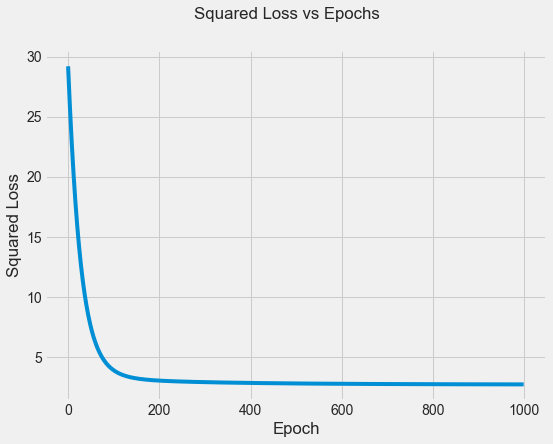

In [126]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(0,1000), loss)
fig.suptitle("Squared Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Squared Loss")
plt.show()

In [127]:
def predict(x_test,y_test,W,b):
    print("\n\033[1mOptimal W: \033[0m",W)
    print("\n\033[1mOptimal Intercept(bias): \033[0m",np.round(b,3))
    y_test = np.asarray(y_test)
    n = x_test.shape[0]
    y_pred = x_test.dot(W) + b
    error = y_test-y_pred
    sq_loss = (1/n) * np.sum(error**2)
    rmse = np.sqrt(sq_loss)
    
    print("\n\033[1mMSE: \033[0m",np.round(sq_loss,3))
    print("\n\033[1mRMSE: \033[0m",np.round(rmse,3))
    
    return y_pred,error
    
if __name__ == "__main__":
    Y_pred,error = predict(X_test,Y_test,optimal_W,optimal_b)


Optimal W:  [-0.95904217  0.84438976  0.40334445  0.86072289 -1.76558169  2.81036255
 -0.3510435  -2.93099602  2.03254144 -1.41696149 -2.05480504  1.05334962
 -3.96253834]

Optimal Intercept(bias):  22.97

MSE:  20.763

RMSE:  4.557


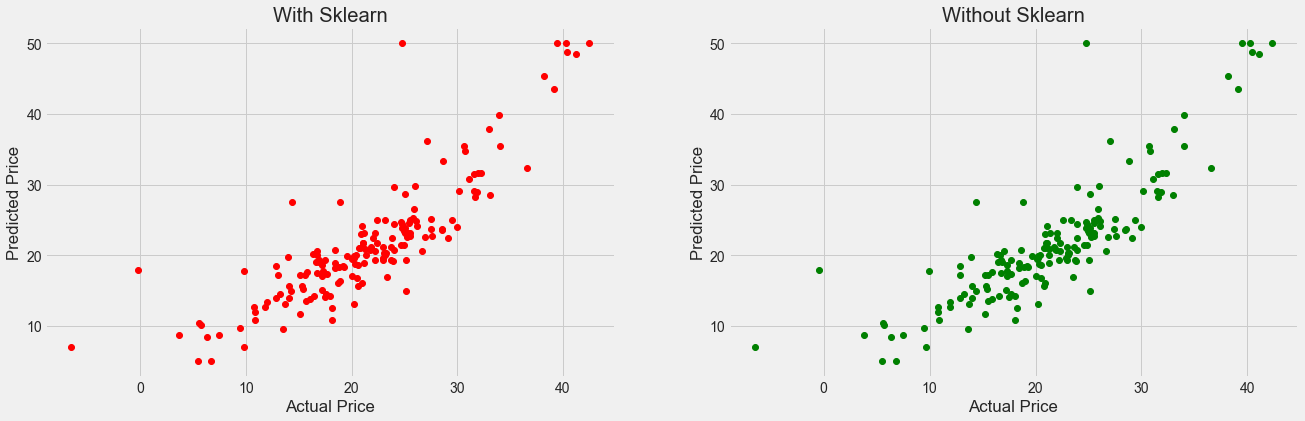

In [128]:
plt.figure(figsize = (20,6))
plt.style.use('fivethirtyeight')

plt.subplot(121)
plt.plot(Y_pred_sklearn,Y_test,'ro')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("With Sklearn")

#plt.figure(figsize = (10,6))
plt.subplot(122)
plt.plot(Y_pred,Y_test,'go')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Without Sklearn")
plt.show()

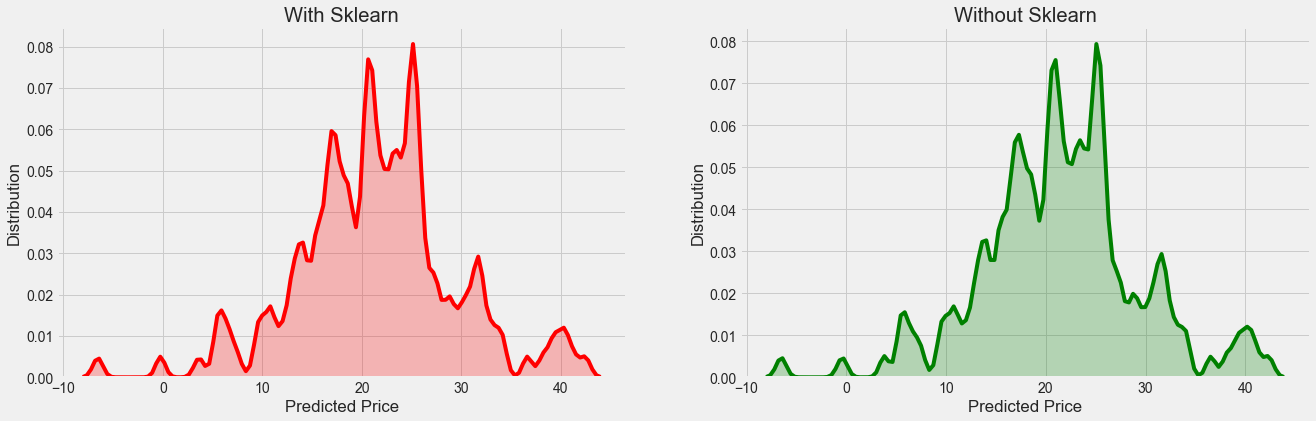

In [129]:
plt.figure(figsize = (20,6))
plt.style.use('fivethirtyeight')

plt.subplot(121)
sns.kdeplot(Y_pred_sklearn, bw = 0.5, color = "r", shade = True)
plt.xlabel("Predicted Price")
plt.ylabel("Distribution")
plt.title("With Sklearn")

plt.subplot(122)
sns.kdeplot(Y_pred, bw = 0.5, color = "g", shade = True)
plt.xlabel("Predicted Price")
plt.ylabel("Distribution")
plt.title("Without Sklearn")
plt.show()

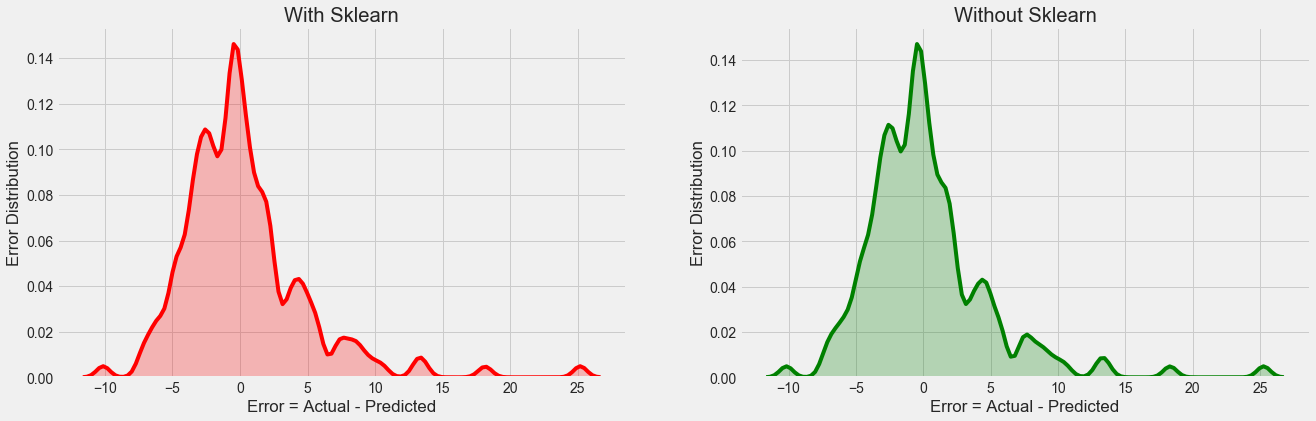

In [130]:
plt.figure(figsize = (20,6))
plt.style.use('fivethirtyeight')

plt.subplot(121)
sns.kdeplot(np.array(error_sklearn), bw = 0.5, color = "r", shade = True)
plt.xlabel("Error = Actual - Predicted")
plt.ylabel("Error Distribution")
plt.title("With Sklearn")

plt.subplot(122)
sns.kdeplot(np.array(error), bw = 0.5, color = "g", shade = True)
plt.xlabel("Error = Actual - Predicted")
plt.ylabel("Error Distribution")
plt.title("Without Sklearn")
plt.show()

## [6] Conclusion : <a name="conclusion"></a>

|  | Intercept | MSE | RMSE | 
| --- | --- | --- | --- |
| <b>Regression(sklearn)</b> | 22.97 | 20.747  | 4.555 |
| <b>SGD Regression(without sklearn</b>) | 22.97 | 20.763  | 4.557 |

<br>
<b>1 - </b>It is seen that in Stochastic Gradient Descent,as the number of epochs(iterations) increases Training Loss(squared loss) also decreases.  

<b>2 - </b>It can be observed from table, MSE and RMSE obtained by SGD Regression(manually) is almost same as that obtained by sklearn Regression model.  

<b>3 - </b>There can be better ways of finding initial weights and bias as well as finding the Learning Rate.